In [2]:
import pandas as pd
import matplotlib as plt


In [3]:
sales_df = pd.read_csv ('sample_sales_data.csv')

In [4]:
sales_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


## EXPLORATORY DATA ANALYSIS

In [5]:
sales_df.isnull().sum()

transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64

In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [7]:
pd.unique(sales_df['customer_type'])

array(['gold', 'standard', 'premium', 'basic', 'non-member'], dtype=object)

In [8]:
pd.unique(sales_df['category'])

array(['fruit', 'vegetables', 'refrigerated items', 'frozen',
       'spices and herbs', 'canned foods', 'packaged foods',
       'condiments and sauces', 'beverages', 'dairy', 'cheese', 'meat',
       'seafood', 'baked goods', 'baking', 'snacks', 'baby products',
       'pets', 'personal care', 'medicine', 'kitchen',
       'cleaning products'], dtype=object)

In [9]:
pd.unique(sales_df['payment_type'])

array(['e-wallet', 'debit card', 'cash', 'credit card'], dtype=object)

In [10]:
import seaborn as sns

## loading of extra data set

In [11]:
temp_df = pd.read_csv("sensor_storage_temperature.csv")
temp_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
temp_df.head()


,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


In [12]:
stock_df = pd.read_csv("sensor_stock_levels.csv")
stock_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [13]:
def convert_to_datetime(data: pd.DataFrame = None, column: str = None):

  dummy = data.copy()
  dummy[column] = pd.to_datetime(dummy[column], format='%Y-%m-%d %H:%M:%S')
  return dummy

In [14]:
sales_df = convert_to_datetime(sales_df, 'timestamp')
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


In [15]:
temp_df = convert_to_datetime(temp_df, 'timestamp')
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           23890 non-null  object        
 1   timestamp    23890 non-null  datetime64[ns]
 2   temperature  23890 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 560.0+ KB


In [16]:
stock_df = convert_to_datetime(stock_df, 'timestamp')
stock_df

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22
...,...,...,...,...
14995,b9bf6788-09f3-490b-959b-dc5b55edb4b6,2022-03-04 10:52:50,e37658de-3649-4ddb-9c73-b868dd69d3fe,0.66
14996,9ff1cc01-020f-491a-bafd-13552dccff44,2022-03-02 12:25:48,fbeb39cc-8cd0-4143-bdfb-77658a02dec9,0.99
14997,4d8101de-e8a2-4af9-9764-7a3a22aa7084,2022-03-03 17:36:44,8e21dcec-d775-4969-8334-05a37a5fd189,0.72
14998,5f2a7b1e-b3c4-4395-8425-c960e22f701d,2022-03-02 19:42:47,9708cf5b-aa69-4320-a013-9d234c40e63f,0.95


In [17]:
stock_df['hour'] = stock_df['timestamp'].dt.hour
temp_df['hour']=temp_df['timestamp'].dt.hour
sales_df['hour']=sales_df['timestamp'].dt.hour

In [18]:
sales_df

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,hour
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,9
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,10
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,17
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet,17
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card,14
...,...,...,...,...,...,...,...,...,...,...
7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet,18
7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card,19
7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card,14
7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash,15


In [19]:
stock_df

,id,timestamp,product_id,estimated_stock_pct,hour
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75,12
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48,16
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58,18
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79,14
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22,13
...,...,...,...,...,...
14995,b9bf6788-09f3-490b-959b-dc5b55edb4b6,2022-03-04 10:52:50,e37658de-3649-4ddb-9c73-b868dd69d3fe,0.66,10
14996,9ff1cc01-020f-491a-bafd-13552dccff44,2022-03-02 12:25:48,fbeb39cc-8cd0-4143-bdfb-77658a02dec9,0.99,12
14997,4d8101de-e8a2-4af9-9764-7a3a22aa7084,2022-03-03 17:36:44,8e21dcec-d775-4969-8334-05a37a5fd189,0.72,17
14998,5f2a7b1e-b3c4-4395-8425-c960e22f701d,2022-03-02 19:42:47,9708cf5b-aa69-4320-a013-9d234c40e63f,0.95,19


In [20]:
sales_df = sales_df.drop_duplicates()
stock_df = stock_df.drop_duplicates()
temp_df = temp_df.drop_duplicates()

In [21]:
sales_agg = sales_df.groupby(['timestamp', 'product_id']).agg({'quantity': 'sum'}).reset_index()
sales_agg.head()

,timestamp,product_id,quantity
0,2022-03-01 09:00:13,9e71fa82-7be2-4320-abd6-f8bc65b41913,3
1,2022-03-01 09:00:18,049b2171-0eeb-4a3e-bf98-0c290c7821da,3
2,2022-03-01 09:00:28,04da844d-8dba-4470-9119-e534d52a03a0,4
3,2022-03-01 09:00:42,6232cdff-0954-496a-b645-09c79abbd6e0,1
4,2022-03-01 09:01:06,6fdec15b-fd57-4920-a84f-211532cbe46a,4


In [22]:
stock_agg = stock_df.groupby(['timestamp', 'product_id']).agg({'estimated_stock_pct': 'mean'}).reset_index()
stock_agg.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:03,891e242e-4e58-469f-8de1-a60ffa8eb286,0.80
1,2022-03-01 09:00:12,440eb479-cf6a-4c55-ba8b-4475bc66dd06,0.33
2,2022-03-01 09:00:23,ae7c026a-2854-4342-8e0b-b1186cedbbe3,0.20
3,2022-03-01 09:00:48,adfbf330-cb1a-4c42-933d-f8fbee4696ad,0.11
4,2022-03-01 09:00:53,9708cf5b-aa69-4320-a013-9d234c40e63f,0.57


In [23]:
temp_agg = temp_df.groupby(['timestamp']).agg({'temperature': 'mean'}).reset_index()
temp_agg.isna().sum()

timestamp      0
temperature    0
dtype: int64

In [24]:
merged_df = stock_agg.merge(sales_agg, on=['timestamp', 'product_id'], how='left')
merged_df.isna().sum()

timestamp                  0
product_id                 0
estimated_stock_pct        0
quantity               14998
dtype: int64

In [25]:
merged_df = merged_df.merge(temp_agg, on='timestamp', how='left')
merged_df.isna().sum()

timestamp                  0
product_id                 0
estimated_stock_pct        0
quantity               14998
temperature            13698
dtype: int64

In [26]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998 entries, 0 to 14997
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            14998 non-null  datetime64[ns]
 1   product_id           14998 non-null  object        
 2   estimated_stock_pct  14998 non-null  float64       
 3   quantity             0 non-null      float64       
 4   temperature          1300 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 703.0+ KB


In [27]:
merged_df['quantity'] = merged_df['quantity'].fillna(0)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998 entries, 0 to 14997
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            14998 non-null  datetime64[ns]
 1   product_id           14998 non-null  object        
 2   estimated_stock_pct  14998 non-null  float64       
 3   quantity             14998 non-null  float64       
 4   temperature          1300 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 703.0+ KB


In [28]:
product_categories = sales_df[['product_id', 'category']]
product_categories = product_categories.drop_duplicates()

product_price = sales_df[['product_id', 'unit_price']]
product_price = product_price.drop_duplicates()

In [29]:
merged_df = merged_df.merge(product_categories, on="product_id", how="left")
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category
0,2022-03-01 09:00:03,891e242e-4e58-469f-8de1-a60ffa8eb286,0.80,0.0,NaN,spices and herbs
1,2022-03-01 09:00:12,440eb479-cf6a-4c55-ba8b-4475bc66dd06,0.33,0.0,NaN,baked goods
2,2022-03-01 09:00:23,ae7c026a-2854-4342-8e0b-b1186cedbbe3,0.20,0.0,1.85,canned foods
3,2022-03-01 09:00:48,adfbf330-cb1a-4c42-933d-f8fbee4696ad,0.11,0.0,NaN,canned foods
4,2022-03-01 09:00:53,9708cf5b-aa69-4320-a013-9d234c40e63f,0.57,0.0,NaN,cheese


In [30]:
merged_df = merged_df.merge(product_price, on="product_id", how="left")
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:03,891e242e-4e58-469f-8de1-a60ffa8eb286,0.80,0.0,NaN,spices and herbs,2.19
1,2022-03-01 09:00:12,440eb479-cf6a-4c55-ba8b-4475bc66dd06,0.33,0.0,NaN,baked goods,8.49
2,2022-03-01 09:00:23,ae7c026a-2854-4342-8e0b-b1186cedbbe3,0.20,0.0,1.85,canned foods,8.99
3,2022-03-01 09:00:48,adfbf330-cb1a-4c42-933d-f8fbee4696ad,0.11,0.0,NaN,canned foods,7.49
4,2022-03-01 09:00:53,9708cf5b-aa69-4320-a013-9d234c40e63f,0.57,0.0,NaN,cheese,13.99


In [31]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998 entries, 0 to 14997
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            14998 non-null  datetime64[ns]
 1   product_id           14998 non-null  object        
 2   estimated_stock_pct  14998 non-null  float64       
 3   quantity             14998 non-null  float64       
 4   temperature          1300 non-null   float64       
 5   category             14998 non-null  object        
 6   unit_price           14998 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 937.4+ KB


In [32]:
merged_df = pd.get_dummies(merged_df, columns=['category'])
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,unit_price,category_baby products,category_baked goods,category_baking,category_beverages,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,2022-03-01 09:00:03,891e242e-4e58-469f-8de1-a60ffa8eb286,0.80,0.0,NaN,2.19,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2022-03-01 09:00:12,440eb479-cf6a-4c55-ba8b-4475bc66dd06,0.33,0.0,NaN,8.49,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-03-01 09:00:23,ae7c026a-2854-4342-8e0b-b1186cedbbe3,0.20,0.0,1.85,8.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022-03-01 09:00:48,adfbf330-cb1a-4c42-933d-f8fbee4696ad,0.11,0.0,NaN,7.49,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-03-01 09:00:53,9708cf5b-aa69-4320-a013-9d234c40e63f,0.57,0.0,NaN,13.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998 entries, 0 to 14997
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   timestamp                       14998 non-null  datetime64[ns]
 1   product_id                      14998 non-null  object        
 2   estimated_stock_pct             14998 non-null  float64       
 3   quantity                        14998 non-null  float64       
 4   temperature                     1300 non-null   float64       
 5   unit_price                      14998 non-null  float64       
 6   category_baby products          14998 non-null  uint8         
 7   category_baked goods            14998 non-null  uint8         
 8   category_baking                 14998 non-null  uint8         
 9   category_beverages              14998 non-null  uint8         
 10  category_canned foods           14998 non-null  uint8         
 11  ca

In [34]:
merged_df.drop(columns=['product_id'], inplace=True)
merged_df.head()

,timestamp,estimated_stock_pct,quantity,temperature,unit_price,category_baby products,category_baked goods,category_baking,category_beverages,category_canned foods,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,2022-03-01 09:00:03,0.80,0.0,NaN,2.19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2022-03-01 09:00:12,0.33,0.0,NaN,8.49,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-03-01 09:00:23,0.20,0.0,1.85,8.99,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2022-03-01 09:00:48,0.11,0.0,NaN,7.49,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2022-03-01 09:00:53,0.57,0.0,NaN,13.99,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
merged_df.isna().sum()

timestamp                             0
estimated_stock_pct                   0
quantity                              0
temperature                       13698
unit_price                            0
category_baby products                0
category_baked goods                  0
category_baking                       0
category_beverages                    0
category_canned foods                 0
category_cheese                       0
category_cleaning products            0
category_condiments and sauces        0
category_dairy                        0
category_frozen                       0
category_fruit                        0
category_kitchen                      0
category_meat                         0
category_medicine                     0
category_packaged foods               0
category_personal care                0
category_pets                         0
category_refrigerated items           0
category_seafood                      0
category_snacks                       0


In [36]:
merged_df['temperature'] = merged_df['temperature'].fillna(0)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998 entries, 0 to 14997
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   timestamp                       14998 non-null  datetime64[ns]
 1   estimated_stock_pct             14998 non-null  float64       
 2   quantity                        14998 non-null  float64       
 3   temperature                     14998 non-null  float64       
 4   unit_price                      14998 non-null  float64       
 5   category_baby products          14998 non-null  uint8         
 6   category_baked goods            14998 non-null  uint8         
 7   category_baking                 14998 non-null  uint8         
 8   category_beverages              14998 non-null  uint8         
 9   category_canned foods           14998 non-null  uint8         
 10  category_cheese                 14998 non-null  uint8         
 11  ca

In [37]:
df=merged_df

In [38]:
df['hour'] = merged_df['timestamp'].dt.hour

In [39]:
df.drop('timestamp',axis=1)

,estimated_stock_pct,quantity,temperature,unit_price,category_baby products,category_baked goods,category_baking,category_beverages,category_canned foods,category_cheese,...,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables,hour
0,0.80,0.0,0.00,2.19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,9
1,0.33,0.0,0.00,8.49,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2,0.20,0.0,1.85,8.99,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,9
3,0.11,0.0,0.00,7.49,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,9
4,0.57,0.0,0.00,13.99,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,0.63,0.0,0.00,2.49,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,19
14994,0.54,0.0,0.00,4.19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,19
14995,0.37,0.0,0.00,1.19,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,19
14996,0.60,0.0,0.00,5.99,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,19


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998 entries, 0 to 14997
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   timestamp                       14998 non-null  datetime64[ns]
 1   estimated_stock_pct             14998 non-null  float64       
 2   quantity                        14998 non-null  float64       
 3   temperature                     14998 non-null  float64       
 4   unit_price                      14998 non-null  float64       
 5   category_baby products          14998 non-null  uint8         
 6   category_baked goods            14998 non-null  uint8         
 7   category_baking                 14998 non-null  uint8         
 8   category_beverages              14998 non-null  uint8         
 9   category_canned foods           14998 non-null  uint8         
 10  category_cheese                 14998 non-null  uint8         
 11  ca

## MODELLING

In [41]:
X = df.drop(columns=['estimated_stock_pct','timestamp','temperature','quantity'])
y = df['estimated_stock_pct']
X

,unit_price,category_baby products,category_baked goods,category_baking,category_beverages,category_canned foods,category_cheese,category_cleaning products,category_condiments and sauces,category_dairy,...,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables,hour
0,2.19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,9
1,8.49,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
2,8.99,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,7.49,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,13.99,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,2.49,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,19
14994,4.19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,19
14995,1.19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,19
14996,5.99,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,19


In [42]:

from xgboost import  XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [45]:
Scaled_X = scaler.fit_transform(X_train)
x=scaler.transform(X_test)

In [46]:
rfg=XGBRegressor(max_depth=3,learning_rate=0.01)

In [47]:
model = rfg.fit(Scaled_X,y_train)

In [48]:
pred = model.predict(X_test)

In [49]:
print(mean_squared_error(y_test,pred))


0.08310202305617326


In [50]:
# Get feature importance scores
importance_scores = model.feature_importances_


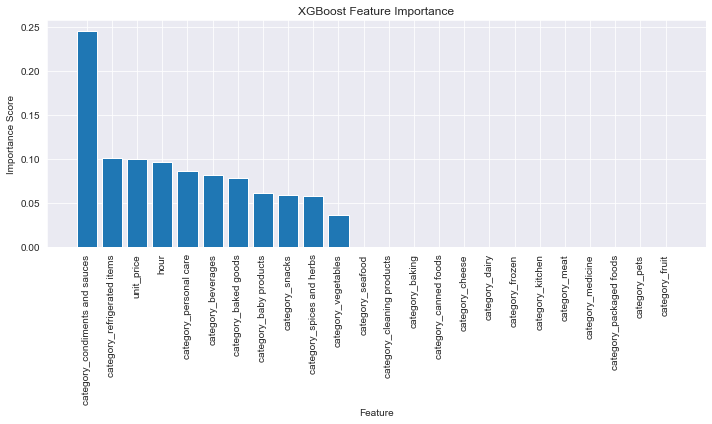

In [51]:
import matplotlib.pyplot as plt

# Sort the features and their importance scores in descending order
sorted_indices = importance_scores.argsort()[::-1]
sorted_importance_scores = importance_scores[sorted_indices]
sorted_feature_names = X.columns[sorted_indices]  # Assuming you are using pandas DataFrames

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance_scores)), sorted_importance_scores)
plt.xticks(range(len(importance_scores)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()
